In [2]:
# generate future y values using past x values AND greater offset y values 

In [4]:
import pandas as pd
import numpy as np
import os
import shutil
import openpyxl
import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib as plt
import re

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV



from sklearn.preprocessing import MinMaxScaler


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from scikeras.wrappers import KerasRegressor


import pickle


print('yes')

yes


In [5]:

def convert_to_dataframe(x):
    return pd.DataFrame(x)


In [6]:
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        Y.append(data[i + time_steps, 0])
        
    return np.array(X), np.array(Y)




In [7]:
def predict_future(model, data, seq_length, future_steps):
    future_predictions = []
    current_sequence = data[-seq_length:].reshape(1, seq_length, data.shape[1])
    
    return(current_sequence)

In [8]:
df = pd.read_csv(r'C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\ELY-TimeSeries\Data\master_data_frame.csv')
df_copy = df.copy()
df_copy = df_copy.drop('Unnamed: 0',axis=1) 
df_copy


to_drop = ['temp_anode_inlet_set', 
           'temp_cathode_inlet_set', 
           'pressure_anode_set',
           'pressure_cathode_set', 
           'flow_anode_di_water_supply_set', 
           'flow_cathode_di_water_supply_set', 
          'flow_cathode_di_water_supply', 
           'signal_in_o2_in_h2_sensor']

df_copy = df_copy.drop(to_drop, axis=1)
df_copy


df_copy['seconds'] = (df_copy['time_running_total']/1000).astype(int)
df_copy['minutes'] = (df_copy['seconds']/60).astype(int)


df_copy = df_copy.drop('time_running_total',axis=1)

# df_copy = df_copy.tail(150000)
df_copy

,cell_voltage_001,current,current_density,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet,temp_cathode_outlet,pressure_anode_inlet,pressure_anode_outlet,pressure_cathode_inlet,pressure_cathode_outlet,flow_anode_di_water_supply,signal_in_resistivity_anode,signal_in_resistivity_cathode,signal_in_h2_in_o2_sensor,seconds,minutes
0,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
1,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
2,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
3,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
4,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461237,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461238,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461239,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243
461240,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243


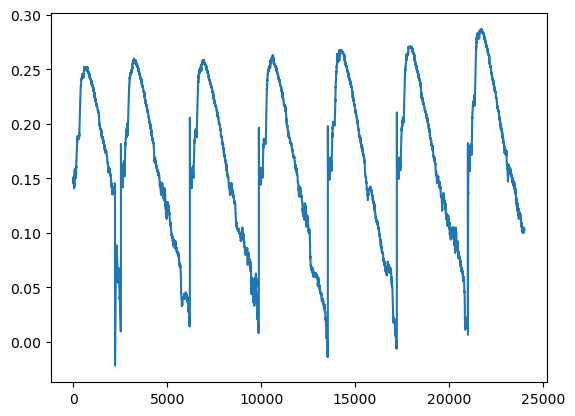

,signal_in_h2_in_o2_sensor
minutes,
2024-06-24 08:37:00,0.145329
2024-06-24 08:38:00,0.145329
2024-06-24 08:39:00,0.145329
2024-06-24 08:40:00,0.145329
2024-06-24 08:41:00,0.145329
...,...
2024-07-12 02:39:00,0.101265
2024-07-12 02:40:00,0.103140
2024-07-12 02:41:00,0.103140


In [9]:
# import matplotlib as plt

time_period = 'minutes'

df_time = df_copy.groupby(time_period).mean().reset_index()

downsampled_df = df_time.tail(24000).reset_index()

# downsampled_df = downsampled_df[['minutes','cell_voltage_001','current','signal_in_h2_in_o2_sensor']]

downsampled_df = downsampled_df[['minutes','signal_in_h2_in_o2_sensor']]


downsampled_df[time_period] = pd.to_datetime('2024-05-16 00:00:00') + pd.to_timedelta(downsampled_df[time_period], unit='m')



plt.plot(downsampled_df['signal_in_h2_in_o2_sensor'])

plt.show()

downsampled_df = downsampled_df.set_index('minutes')
downsampled_df

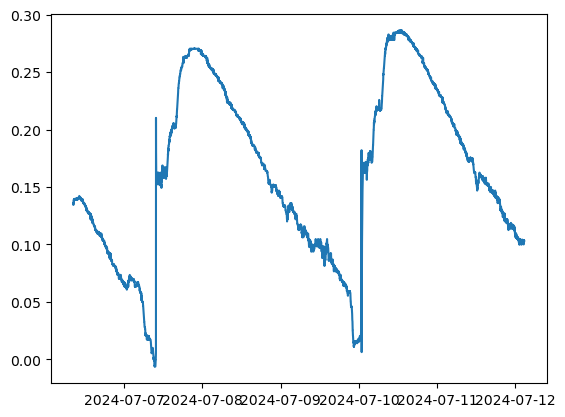

In [10]:
l = len(downsampled_df)
train_length = 15700

downsampled_1_df = downsampled_df.head(15700)
downsampled_2_df = downsampled_df.tail(l-train_length)

plt.plot(downsampled_2_df['signal_in_h2_in_o2_sensor'])

plt.show()

# downsampled_2_df

In [118]:




# pipeline


pipeline = ColumnTransformer([
    ('voltage_current_scaler', MinMaxScaler(), ['signal_in_h2_in_o2_sensor']),
    ('trend_scaler', StandardScaler(), ['trend'])

])




y_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),

])





# Fit and transform the data






# Step 1: Split the data BEFORE creating the dataset
train_size = int(len(downsampled_1_df) * 0.8)
train_data = downsampled_1_df[:train_size]
test_data = downsampled_1_df[train_size:]



trend = (np.arange(len(train_data))).tolist()
train_data['trend'] = trend
trend = (np.arange(len(test_data))).tolist()
test_data['trend'] = trend



train_data_trans = pipeline.fit_transform(train_data)
test_data_trans = pipeline.fit_transform(test_data)


time_steps = 100


# Step 2: Create training and test sets independently
X_train, y_train = create_dataset(train_data_trans, time_steps=time_steps)
X_test, y_test = create_dataset(test_data_trans, time_steps=time_steps)




# Step 3: Reshape the data for LSTM (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

C:\Users\whiter04\AppData\Local\Temp\ipykernel_16824\423072530.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['trend'] = trend
C:\Users\whiter04\AppData\Local\Temp\ipykernel_16824\423072530.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['trend'] = trend


In [119]:
X_train.shape

(12460, 100, 2)

In [101]:
# Tuning of Hyperparameters 

In [102]:
import keras.backend as K
from keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [188]:
def create_model(hp):
    model = Sequential()
    
    model.add(LSTM(hp.Int('input_unit', min_value = 90, max_value = 150, step = 10),
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(hp.Float('Dropout_rate_1', min_value=0, max_value=0.5, step=0.1)))


    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value=90, max_value=150, step=10),
                      return_sequences=True if i < hp.Int('n_layers', 1, 10) - 1 else False))


    model.add(Dropout(hp.Float('Dropout_rate_2', min_value=0, max_value=0.5, step=0.1)))


    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [189]:
tuner= kt.RandomSearch(
        create_model,
        objective='mse',
        max_trials=30,
        executions_per_trial=3,
        directory='.\hp_test_bb01',
        project_name='hp_bb01'
        )

In [ ]:
tuner.search(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


best_model = tuner.get_best_models(num_models=1)[0]


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

for param, value in best_hps.values.items():
    print(f"{param}: {value}")

Trial 8 Complete [00h 21m 06s]
mse: 0.0009765121115682026

Best mse So Far: 0.0003441933949943632
Total elapsed time: 02h 22m 17s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
90                |110               |input_unit
0.2               |0.4               |Dropout_rate_1
4                 |1                 |n_layers
150               |90                |lstm_0_units
0.4               |0                 |Dropout_rate_2
150               |110               |lstm_1_units
100               |120               |lstm_2_units
140               |130               |lstm_3_units

Epoch 1/20
197/197 [==============================] - 52s 157ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/20
197/197 [==============================] - 25s 128ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 8.7263e-04 - val_mse: 8.7263e-04
Epoch 3/20
197/197 [==============================] - 30s 155ms/step - loss: 0.0035 - mse: 0.0035 - val_l

In [122]:
model = create_model()

In [172]:
model.fit(x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),)

Epoch 1/20
99/99 [==============================] - 3s 33ms/step - loss: 9.1448e-04 - mse: 9.1448e-04 - val_loss: 7.6234e-04 - val_mse: 7.6234e-04
Epoch 2/20
99/99 [==============================] - 3s 33ms/step - loss: 9.0089e-04 - mse: 9.0089e-04 - val_loss: 7.3404e-04 - val_mse: 7.3404e-04
Epoch 3/20
99/99 [==============================] - 4s 38ms/step - loss: 8.4631e-04 - mse: 8.4631e-04 - val_loss: 6.3261e-04 - val_mse: 6.3261e-04
Epoch 4/20
99/99 [==============================] - 4s 39ms/step - loss: 7.9860e-04 - mse: 7.9860e-04 - val_loss: 5.4534e-04 - val_mse: 5.4534e-04
Epoch 5/20
99/99 [==============================] - 4s 37ms/step - loss: 8.4720e-04 - mse: 8.4720e-04 - val_loss: 3.9830e-04 - val_mse: 3.9830e-04
Epoch 6/20
99/99 [==============================] - 4s 39ms/step - loss: 7.7205e-04 - mse: 7.7205e-04 - val_loss: 4.0139e-04 - val_mse: 4.0139e-04
Epoch 7/20
99/99 [==============================] - 4s 41ms/step - loss: 7.3767e-04 - mse: 7.3767e-04 - val_loss: 6.18

In [120]:
def create_model_opt_1():
    model = Sequential()
    
    model.add(LSTM(110,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(0.4))


    model.add(LSTM(90, return_sequences = True))


    # model.add(Dropout(0.1))

    model.add(LSTM(90, return_sequences = True))

    model.add(Dropout(0.4))
    
    model.add(LSTM(110, return_sequences = True))

    model.add(LSTM(120, return_sequences = True))

    model.add(LSTM(130, return_sequences = False))
    

    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [121]:
def create_model_opt_2():
    model = Sequential()
    
    model.add(LSTM(110,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(0.4))


    model.add(LSTM(90, return_sequences = True))


    # model.add(Dropout(0.1))

    model.add(LSTM(90, return_sequences = True))

    # model.add(Dropout(0.4))
    
    model.add(LSTM(110, return_sequences = True))

    model.add(LSTM(120, return_sequences = True))

    model.add(LSTM(130, return_sequences = False))
    

    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [122]:

optimised_model_1 = create_model_opt_1()


optimised_model_2 = create_model_opt_2()



optimised_model_1.fit(x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),)




optimised_model_2.fit(x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),)





predictions_1 = optimised_model_1.predict(X_test)
predictions_2 = optimised_model_2.predict(X_test)


predictions = predictions_1*0.5 + predictions_2*0.5


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crossover Rate')
plt.plot(predictions, label='Predicted Crossover Rate')
plt.legend()
plt.show()


Epoch 1/20
98/98 [==============================] - 337s 3s/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/20
98/98 [==============================] - 241s 2s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/20
98/98 [==============================] - 205s 2s/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/20
98/98 [==============================] - 230s 2s/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 5/20
98/98 [==============================] - 231s 2s/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 6/20
98/98 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016

KeyboardInterrupt: 

In [116]:
import datetime
import numpy as np
import pandas as pd

# Initialize predictions
predictions = np.array([]).reshape(-1, 1)

# Parameters

num = 0

n=time_steps
n_predictions = 10000
window_size = time_steps

y_offset = time_steps

# y_offset_1 = y_offset


scaler = MinMaxScaler()

predictions = []





# Previous data setup
previous_data = downsampled_1_df.copy()

prev_y_and_new_y = pd.DataFrame(previous_data['signal_in_h2_in_o2_sensor'])
trend = (np.arange(len(prev_y_and_new_y))).tolist()
prev_y_and_new_y['trend'] = trend
prev_y_and_new_y



new_data = downsampled_2_df.copy()
new_data = new_data.drop(['signal_in_h2_in_o2_sensor'], axis=1)



new_data




# # Prepare recent features

last_trend_value = prev_y_and_new_y['trend'].iloc[-1]  # Get the last value of the existing trend
new_data['trend'] = np.arange(last_trend_value + 1, last_trend_value + 1 + len(new_data)).tolist()
new_data


scaler.fit(previous_data[['signal_in_h2_in_o2_sensor']])



# # Initial  values (taken from the last 3  values)
initial_y = previous_data['signal_in_h2_in_o2_sensor'].iloc[-n:].tolist()




y_offset_1 = len(prev_y_and_new_y)
window_size = time_steps



# new_smoothed_y = initial_smoothed_y.copy()

fiter = pipeline.fit(prev_y_and_new_y)

for preds in range(n_predictions):
    

    
    
    lagged_y = prev_y_and_new_y.iloc[y_offset_1-window_size:y_offset_1]
    # print(f'lagged_y:{lagged_y}')
    
    lagged_y_trans = fiter.transform(pd.DataFrame(lagged_y))
    # print(lagged_y_trans)
    
    
    lagged_y_trans.shape
    lagged_y_trans = np.reshape(lagged_y_trans, (1, time_steps, 2))
    
    # print(lagged_y_trans.shape)
    
    
    predictions_1 = optimised_model_1.predict(lagged_y_trans)
    predictions_2 = optimised_model_2.predict(lagged_y_trans)
    
    
    predictions = predictions_1*0.5 + predictions_2*0.5
    # predictions = predictions_1*0.5 + predictions_2*0.5
    
    # predictions = optimised_model.predict(lagged_y_trans)
    print(predictions)
    
    
    scaler = fiter.named_transformers_['voltage_current_scaler']
    true_predictions = scaler.inverse_transform(predictions)
    print(true_predictions)
    prev_y_and_new_y
    
    
    last_value = prev_y_and_new_y['trend'].iloc[-1]
    new_row = pd.DataFrame({'signal_in_h2_in_o2_sensor': [true_predictions[0][0]], 'trend': [last_value+1]})
    
    prev_y_and_new_y = pd.concat([prev_y_and_new_y, new_row], ignore_index=True)
    
    # print(prev_y_and_new_y)
    y_offset_1 += 1






1/1 [==============================] - 0s 90ms/step
[[0.53174853]]
[[0.13201575]]
1/1 [==============================] - 0s 84ms/step
[[0.5323081]]
[[0.13217768]]
1/1 [==============================] - 0s 90ms/step
[[0.5326807]]
[[0.1322855]]
1/1 [==============================] - 0s 86ms/step
[[0.53277385]]
[[0.13231246]]
1/1 [==============================] - 0s 72ms/step
[[0.53256583]]
[[0.13225226]]
1/1 [==============================] - 0s 66ms/step
[[0.5321008]]
[[0.13211769]]
1/1 [==============================] - 0s 69ms/step
[[0.5314615]]
[[0.13193269]]
1/1 [==============================] - 0s 76ms/step
[[0.53073543]]
[[0.13172258]]
1/1 [==============================] - 0s 81ms/step
[[0.52999306]]
[[0.13150775]]
1/1 [==============================] - 0s 85ms/step
[[0.5292793]]
[[0.1313012]]
1/1 [==============================] - 0s 90ms/step
[[0.5286111]]
[[0.13110784]]
1/1 [==============================] - 0s 80ms/step
[[0.5279881]]
[[0.13092753]]
1/1 [====================

KeyboardInterrupt: 

<Axes: >

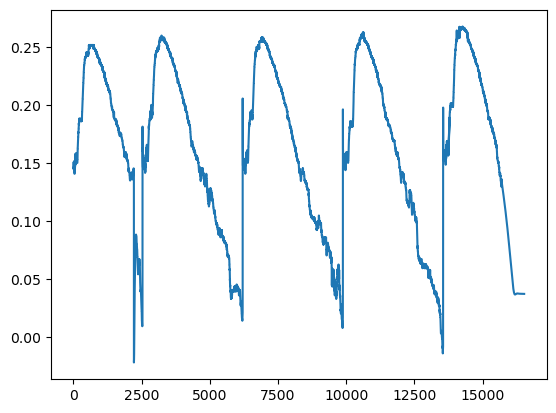

In [117]:
prev_y_and_new_y['signal_in_h2_in_o2_sensor'].plot()

In [110]:
lagged_y_trans

array([[0.53455881, 1.7299547 ],
       [0.53995649, 1.73017534],
       [0.53671788, 1.73039599],
       [0.53995649, 1.73061663],
       [0.53995649, 1.73083727],
       [0.53995649, 1.73105792],
       [0.53995649, 1.73127856],
       [0.54535763, 1.7314992 ],
       [0.54211695, 1.73171985],
       [0.54319718, 1.73194049]])

In [87]:
y_offset_1 = len(prev_y_and_new_y)
window_size = 10


fiter = pipeline.fit(prev_y_and_new_y)


lagged_y = prev_y_and_new_y.iloc[y_offset_1-window_size:y_offset_1]
print(lagged_y)

lagged_y_trans = fiter.transform(pd.DataFrame(lagged_y))
print(lagged_y_trans)


lagged_y_trans.shape
lagged_y_trans = np.reshape(lagged_y_trans, (1, 10, 2))

print(lagged_y_trans.shape)


predictions_1 = optimised_model_1.predict(lagged_y_trans)
predictions_2 = optimised_model_2.predict(lagged_y_trans)


predictions = predictions_1*0.65 + predictions_2*0.35


# predictions = optimised_model.predict(lagged_y_trans)
print(predictions)


scaler = fiter.named_transformers_['voltage_current_scaler']
true_predictions = scaler.inverse_transform(predictions)

prev_y_and_new_y


last_value = prev_y_and_new_y['trend'].iloc[-1]
new_row = pd.DataFrame({'signal_in_h2_in_o2_sensor': [true_predictions[0][0]], 'trend': [last_value+1]})

prev_y_and_new_y = pd.concat([prev_y_and_new_y, new_row], ignore_index=True)

print(prev_y_and_new_y)

# voltage_current_scaler

       signal_in_h2_in_o2_sensor  trend
15748                   0.135897  15748
15749                   0.135897  15749
15750                   0.135897  15750
15751                   0.135897  15751
15752                   0.135897  15752
15753                   0.135897  15753
15754                   0.135897  15754
15755                   0.135897  15755
15756                   0.135897  15756
15757                   0.135897  15757
[[0.54516126 1.72996241]
 [0.54516126 1.73018225]
 [0.54516126 1.73040208]
 [0.54516126 1.73062191]
 [0.54516126 1.73084174]
 [0.54516126 1.73106157]
 [0.54516126 1.7312814 ]
 [0.54516126 1.73150123]
 [0.54516126 1.73172106]
 [0.54516126 1.7319409 ]]
(1, 10, 2)
1/1 [==============================] - 0s 32ms/step
[[0.5519289]]
       signal_in_h2_in_o2_sensor  trend
0                       0.145329      0
1                       0.145329      1
2                       0.145329      2
3                       0.145329      3
4                       0.145329

[('voltage_current_scaler', MinMaxScaler(), ['signal_in_h2_in_o2_sensor']), ('trend_scaler', StandardScaler(), ['trend'])]


In [106]:
prev_y_and_new_y

,signal_in_h2_in_o2_sensor,trend
minutes,,
2024-06-24 08:37:00,0.145329,0
2024-06-24 08:38:00,0.145329,1
2024-06-24 08:39:00,0.145329,2
2024-06-24 08:40:00,0.145329,3
2024-06-24 08:41:00,0.145329,4
...,...,...
2024-07-06 08:17:00,0.134391,15695
2024-07-06 08:18:00,0.134391,15696
2024-07-06 08:19:00,0.135954,15697


In [145]:
new_data = downsampled_2_df.copy()
new_data

,signal_in_h2_in_o2_sensor
minutes,
2024-07-06 08:22:00,0.135954
2024-07-06 08:23:00,0.135954
2024-07-06 08:24:00,0.134391
2024-07-06 08:25:00,0.135016
2024-07-06 08:26:00,0.135954
...,...
2024-07-12 02:39:00,0.101265
2024-07-12 02:40:00,0.103140
2024-07-12 02:41:00,0.103140


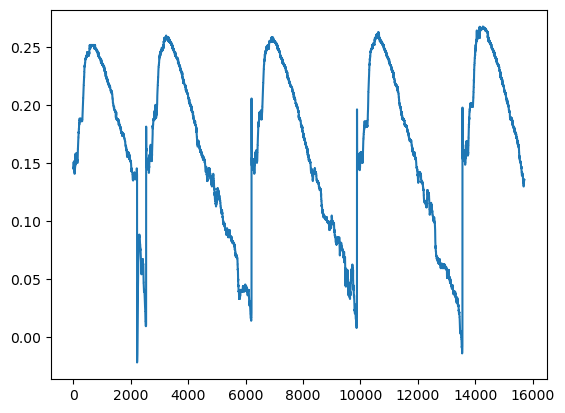

In [97]:
plt.plot(prev_y_and_new_y['signal_in_h2_in_o2_sensor'].tolist())

In [101]:
lagged_y

[0.2478322, 0.246895, 0.246895]

In [ ]:
downsampled_2_df = downsampled_df.tail(l-train_length)

plt.plot(downsampled_2_df['signal_in_h2_in_o2_sensor'].tolist())

plt.show()

In [ ]:
plt.plot(predictions)